In [1]:
import pandas as pd
import sqlite3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
connect_sql = sqlite3.connect('/content/drive/MyDrive/ex07_42/checking-logs.sqlite')

In [26]:
 pd.read_sql('select * from pageviews t where t.uid like "user%"', connect_sql)

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


In [27]:
df = pd.read_sql('select * from pageviews t where t.uid like "user%"', connect_sql, parse_dates=['datetime'])
df 

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


In [30]:
df_new = df['datetime'].dt.floor('d').value_counts()
df_new = df_new.rename_axis('date')
df_new = df_new.reset_index(name='views')

In [31]:
df_new

,date,views
0,2020-05-11,200
1,2020-05-14,187
2,2020-05-10,110
3,2020-05-13,102
4,2020-05-12,85
5,2020-05-18,51
6,2020-05-08,48
7,2020-05-15,29
8,2020-04-18,23
9,2020-05-03,19


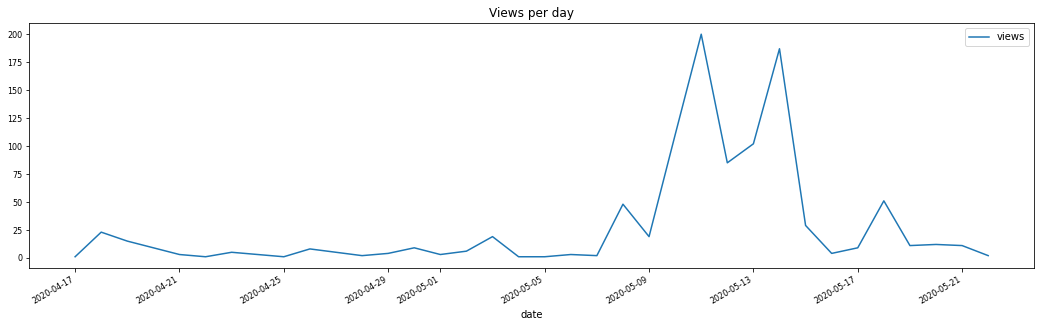

In [32]:
df_new.plot(x = 'date', y = 'views', figsize=(18, 5), title="Views per day", fontsize=8)